# **Comprensión de negocio**

En este trabajo cargaremos el dataset de una empresa Telco. El objetivo es ser capaces de generar un modelo de predicción de fuga de clientes, de este modo negocio sea capaz de tomar medidas y asi evitar la fuga de estos clientes.
 Las empresas de servicios suelen utilizar estos modelos para retener a sus clientes ya que es más barato retener a un cliente que atraer uno nuevo.
 

# **Carga del Dataset**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import warnings
import seaborn as sns
import pandas as pd
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn (1).csv', sep = ',')
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [ ]:
df.shape


(7043, 21)

# **Comprensión de los datos**

El dataset tiene un total de 7043 filas correspondiente cada una a un cliente y 21 columnas en cada columna tenemos los diferentes atributos afectando a cada cliente.

**Atributos:**


* **1. CustomerID:** Customer ID
* **2. Gender: ** si el cliente es hombre = “male” y si es mujer = “female”
* **3. SeniorCitizen :** si el cliente es senior o no (1,0)
* **4. Partner :** Si el cliente tiene un partner o no (Yes,No).
* **5.	Dependents :** si el cliente tiene dependientes o no (Yes,No).
* **6.	Ternure :** Número de meses que el cliente ha estado en la compañía
* **7.	PhoneService :** Si el cliente tiene un servicio móvil o no (Yes,No)
* **8.	MultipleLines :** Si el cliente tiene multiples líneas (Yes, No, No pone service)
* **9.	InternetService:**  Proveedor de servicio de internet del cliente (DSL,Fiber optic, No)
* **10.	OnlineSecurity :**  Si el cliente tiene seguridad online o no (Yes,No, No internet service)
* **11.	OnlineBackup :**  Si el cliente tiene backup online o no (Yes,No, No internet service).
* **12.	DeviceProtection :** Si el cliente tiene protección para el sispositivo o no (Yes, No, No internet service)
* **13.	TechSupport:** Si el cliente tien soporte o no (Yes, No, No internet service)
* **14.	StreamingTV :** Si el cliente tiene TV en streaming o no (Yes, No, No internet sercice)
* **15.	StreamingMovies :**). Si el cliente tiene películas en streaming o no (Yes, No, No internet service)
* **16.	Contract :** Los términos del contrato del cliente. (Month-to- Month, One year, Two year)
* **17.	PaperlessBilling :** Si el cliente tiene factura digital o no (Yes, No)
* **18.	PaymentMethod :** El método de pago del cliente. (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)
* **19.	MonthlyCharges:** ). La cantidad cargada por el cliente mensualmente
* **20.	TotalCharges:** La cantidad total cargada al cliente
* **21.	Churn :** Si el cliente se ha ido de la compañía o no (Yes o No). Esta es nuestra variable objetivo.



Overview de los datos:


In [ ]:
print ("Rows     : " ,df.shape[0])
print ("Columns  : " ,df.shape[1])
print ("\nFeatures : \n" ,df.columns.tolist())
print ("\nMissing values :  ", df.isnull().sum().values.sum())
print ("\nUnique values :  \n",df.nunique())

Rows     :  7043
Columns  :  21

Features : 
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Missing values :   0

Unique values :  
 customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


In [ ]:
print(df.describe())
print(df.info())

       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines  

## Comenzamos con el estudio de las variables

### Variable objetivo: Churn

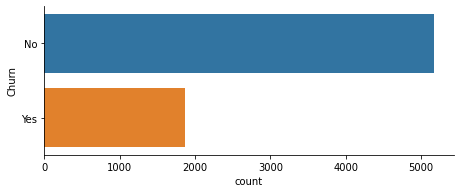

In [ ]:
ax = sns.catplot(y="Churn", kind="count", data=df, height=2.6, aspect=2.5 )

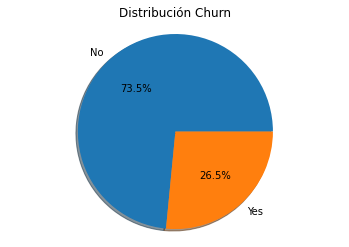

In [ ]:
# pie chart del churn
labels = ['No','Yes']
sizes = [df['Churn'].value_counts()[0],
         df['Churn'].value_counts()[1],
                ]

fig1, ax1 = plt.subplots()
ax1.pie(sizes,labels=labels , autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
ax1.title.set_text('Distribución Churn')
plt.show()

De nuestro dataset el 73,5 % de los clientes no abandonaron la empresa, mientras que el resto sí.
El objetivo es crear un modelo que prediga si un cliente pertenecera a un grupo o al otro.


Analisis de las variables (siguiendo el orden de las columnas):

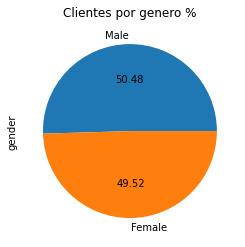

In [ ]:
# Distribución de clientes por género en porcentaje
plot = (100 * df['gender'].value_counts() / len(df['gender'])).plot(
kind='pie', title='Clientes por genero %',autopct='%.2f')

Tenemos bastante paridad en la muestra entorno al genero

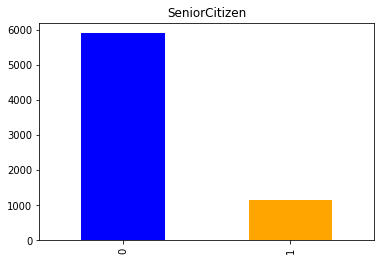

In [ ]:
colores = ['blue', 'orange']
# gráfico de barras de Seniorcitizen
plot = df['SeniorCitizen'].value_counts().plot(kind='bar',color=colores,  title='SeniorCitizen')



5901 son Senior 1142 no lo son


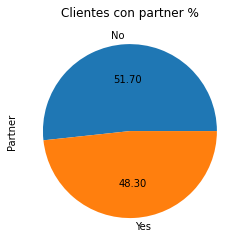

In [ ]:
# Distribución de clientes por partner en porcentaje
plot = (100 * df['Partner'].value_counts() / len(df['Partner'])).plot(
kind='pie', title='Clientes con partner %',autopct='%.2f')

 El 52% de los clientes no tiene partner, mientras que el 48% restante sí.

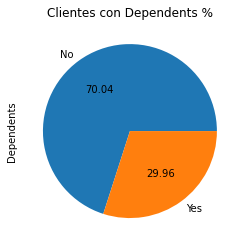

In [ ]:
# Distribución de clientes por dependents en porcentaje
plot = (100 * df['Dependents'].value_counts() / len(df['Dependents'])).plot(
kind='pie', title='Clientes con Dependents %',autopct='%.2f')

En torno a un 70% no tiene dependientes y un 30% sí los tiene

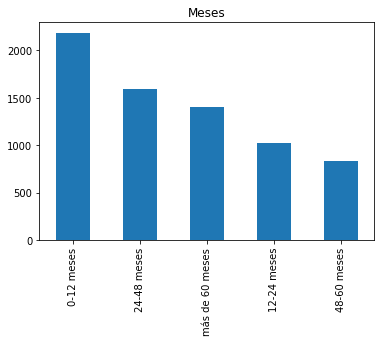

In [ ]:
#Agrupo en meses el tiempo que el cliente se ha quedado en la compañía para ello: 
#Convierto la columna Tenure en valores categóricos para no tener un valor por cada número de meses
def tenure_lab(df) :
    
    if df["tenure"] <= 12 :
        return "0-12 meses"
    elif (df["tenure"] > 12) & (df["tenure"] <= 24 ):
        return "12-24 meses"
    elif (df["tenure"] > 24) & (df["tenure"] <= 48) :
        return "24-48 meses"
    elif (df["tenure"] > 48) & (df["tenure"] <= 60) :
        return "48-60 meses"
    elif df["tenure"] > 60 :
        return "más de 60 meses"
df["tenure_group"] = df.apply(lambda df:tenure_lab(df),
                                      axis = 1)

plot = df['tenure_group'].value_counts().plot(kind='bar',
                                            title='Meses',)

Aquí podemos ver la distribución en el tiempo de nuestros clientes.

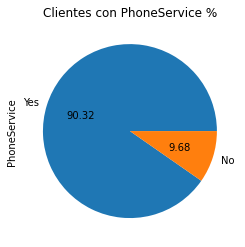

In [ ]:
# Distribución de clientes por PhoneService en porcentaje
plot = (100 * df['PhoneService'].value_counts() / len(df['PhoneService'])).plot(
kind='pie', title='Clientes con PhoneService %',autopct='%.2f')

El 90% tiene servicio de telefono en la compañía

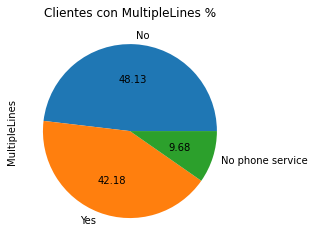

In [ ]:
# Distribución de clientes por MultipleLines en porcentaje
plot = (100 * df['MultipleLines'].value_counts() / len(df['MultipleLines'])).plot(
kind='pie', title='Clientes con MultipleLines %',autopct='%.2f')

Ahora dividimos en dos subgrupos los que si tienen teléfono: siendo un 42% los que tienen más de una línea y el 48% solo teniendo una. Como hemos visto en el gráfico anterior casi el 10% no tiene linea de teléfono.

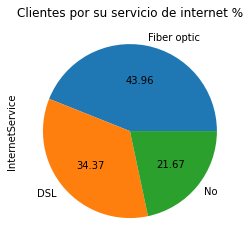

In [ ]:
# Distribución de clientes por InternetService en porcentaje. Viendo los productos que tienen contratados.
plot = (100 * df['InternetService'].value_counts() / len(df['MultipleLines'])).plot(
kind='pie', title='Clientes por su servicio de internet %',autopct='%.2f')

Un 43,96% tiene fibra óptica, el 34,37% DSL y el resto no tiene servicio de internet.

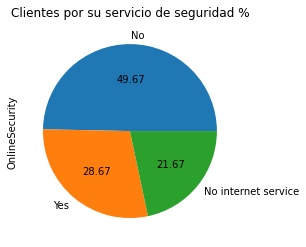

In [ ]:
# Distribución de clientes por OnlineSecurity en porcentaje. Viendo los productos que tienen contratados.
plot = (100 * df['OnlineSecurity'].value_counts() / len(df['OnlineSecurity'])).plot(
kind='pie', title='Clientes por su servicio de seguridad %',autopct='%.2f')

 El 28% de los clientes tiene  servicio online de seguridad contratado, mientras que  un 50% no lo tiene, el 22% restante son aquellos que no tienen servicio de internet contratado.

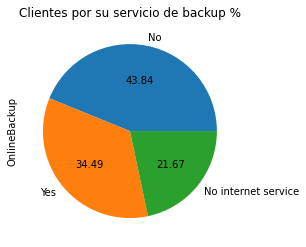

In [ ]:
# Distribución de clientes por OnlineBackup en porcentaje. Viendo los productos que tienen contratados.
plot = (100 * df['OnlineBackup'].value_counts() / len(df['OnlineBackup'])).plot(
kind='pie', title='Clientes por su servicio de backup %',autopct='%.2f')

El 44% de los clientes no tiene servicio de backup,el 34% que sí lo tiene y el 22% restante aquellos sin servicio de internet.

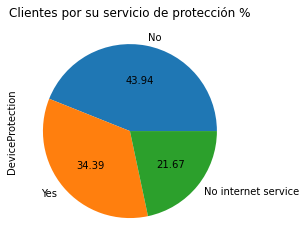

In [ ]:
# Distribución de clientes por DeviceProtection en porcentaje. Viendo los productos que tienen contratados.
plot = (100 * df['DeviceProtection'].value_counts() / len(df['DeviceProtection'])).plot(
kind='pie', title='Clientes por su servicio de protección %',autopct='%.2f')

El 44% de los clientes no tiene servicio de protección,el 35% que sí lo tiene y el 22% restante aquellos sin servicio de internet.

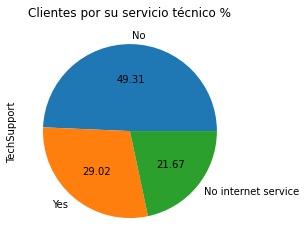

In [ ]:
# Distribución de clientes por TechSupport en porcentaje. Viendo los productos que tienen contratados.
plot = (100 * df['TechSupport'].value_counts() / len(df['TechSupport'])).plot(
kind='pie', title='Clientes por su servicio técnico %',autopct='%.2f')

El 49% de los clientes no tiene servicio de técnico,el 29% que sí lo tiene y el 22% restante aquellos sin servicio de internet.

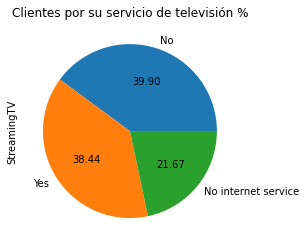

In [ ]:
# Distribución de clientes por StreamingTV en porcentaje. Viendo los productos que tienen contratados.
plot = (100 * df['StreamingTV'].value_counts() / len(df['StreamingTV'])).plot(
kind='pie', title='Clientes por su servicio de televisión %',autopct='%.2f')

El 40% de los clientes no tiene servicio de tele,el 38% que sí lo tiene y el 22% restante aquellos sin servicio de internet.

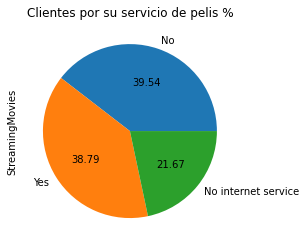

In [ ]:
# Distribución de clientes por StreamingMovies en porcentaje. Viendo los productos que tienen contratados.
plot = (100 * df['StreamingMovies'].value_counts() / len(df['StreamingMovies'])).plot(
kind='pie', title='Clientes por su servicio de pelis %',autopct='%.2f')

El 40% de los clientes no tiene servicio de pelis,el 38% que sí lo tiene y el 22% restante aquellos sin servicio de internet.

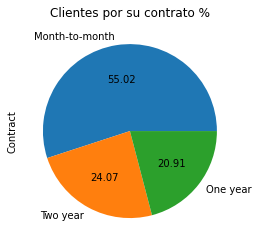

In [ ]:
# Distribución de clientes por Contract en porcentaje. Viendo los productos que tienen contratados.
plot = (100 * df['Contract'].value_counts() / len(df['Contract'])).plot(
kind='pie', title='Clientes por su contrato %',autopct='%.2f')

El 55% de los clientes tiene contrato mes a mes el 20% de un año y el 22% restante de dos años.

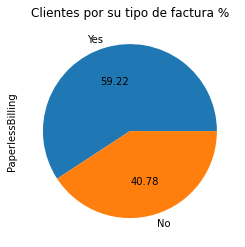

In [ ]:
# Distribución de clientes si tienen la factura en papel o no
plot = (100 * df['PaperlessBilling'].value_counts() / len(df['PaperlessBilling'])).plot(
kind='pie', title='Clientes por su tipo de factura %',autopct='%.2f')

el 59% se le factura de forma digital el resto en papel.

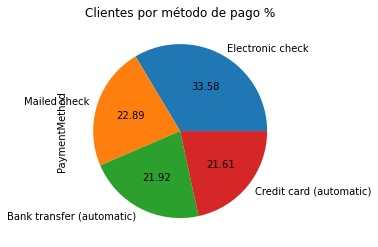

In [ ]:
# Distribución de clientes por metodo de pago
plot = (100 * df['PaymentMethod'].value_counts() / len(df['PaymentMethod'])).plot(
kind='pie', title='Clientes por método de pago %',autopct='%.2f')

El 34% de los clientes paga con cheque electrónico.
El 23% de los clientesa través de cheque pero domiciliado.
El 22% de los clientes pagó con transferencia bancaria automática.
El 22% de los clientes restante tiene asociada su tarjeta de crédito.


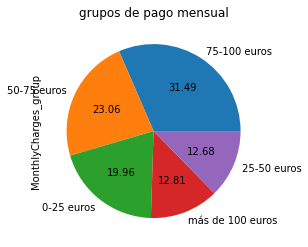

In [ ]:
#Distribución en grupos de lo que paga el cliente al mes, para ello: 
#Convierto la columna MonthlyCharges en valores categóricos:
def MonthlyCharges_lab(df) :
    
    if df["MonthlyCharges"] <= 25 :
        return "0-25 euros"
    elif (df["MonthlyCharges"] > 25) & (df["MonthlyCharges"] <= 50 ):
        return "25-50 euros"
    elif (df["MonthlyCharges"] > 50) & (df["MonthlyCharges"] <= 75) :
        return "50-75 euros"
    elif (df["MonthlyCharges"] > 75) & (df["MonthlyCharges"] <= 100) :
        return "75-100 euros"
    elif df["MonthlyCharges"] > 100 :
        return "más de 100 euros"
df["MonthlyCharges_group"] = df.apply(lambda df:MonthlyCharges_lab(df),
                                      axis = 1)

plot = (100 * df['MonthlyCharges_group'].value_counts() / len(df['MonthlyCharges_group'])).plot(
kind='pie', title='grupos de pago mensual',autopct='%.2f')



*   El 20% paga menos de 25€.
*   El 13% entre 25 y 50€.
*   El 23% entre 50 y 75€
*   El 31% entre 75 y 100€
*   El 13% restante más de 100€







### Manipulación de variable

En total charges hay un total de 11 campos vacios, esto se debe a clientes que todavía no han pagado. En el data set aparecen como espacios, por eso no lo detectamos como nulos.
Tenemos que cambiar esos vacios por ceros para poder hacer calculos con el campo "TotalCharges"

In [ ]:
df['TotalCharges'] = df['TotalCharges'].replace(" ", 0).astype('float64')

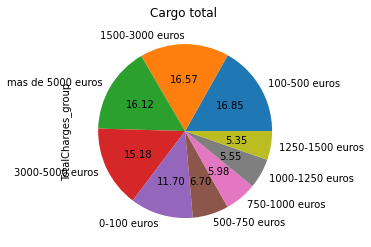

In [ ]:
#transformo los valores en categóricos
def TotalCharges_lab(df) :
    
    if df["TotalCharges"] <= 100 :
        return "0-100 euros"
    elif (df["TotalCharges"] > 100) & (df["TotalCharges"] <= 500 ):
        return "100-500 euros"
    elif (df["TotalCharges"] > 500) & (df["TotalCharges"] <= 750) :
        return "500-750 euros"
    elif (df["TotalCharges"] > 750) & (df["TotalCharges"] <= 1000) :
        return "750-1000 euros"
    elif (df["TotalCharges"] > 1000) & (df["TotalCharges"] <= 1250) :
        return "1000-1250 euros"
    elif (df["TotalCharges"] > 1250) & (df["TotalCharges"] <= 1500) :
        return "1250-1500 euros"
    elif (df["TotalCharges"] > 1500) & (df["TotalCharges"] <= 3000) :
        return "1500-3000 euros"
    elif (df["TotalCharges"] > 3000) & (df["TotalCharges"] <= 5000) :
        return "3000-5000 euros"
    elif df["TotalCharges"] > 5000 :
        return "mas de 5000 euros"
df["TotalCharges_group"] = df.apply(lambda df:TotalCharges_lab(df),
                                      axis = 1)
plot = (100 * df['TotalCharges_group'].value_counts() / len(df['TotalCharges_group'])).plot(
kind='pie', title='Cargo total ',autopct='%.2f')

Ya tendriamos en analisis de las diferentes variables en el data set.


# Comportamiento de la variable objetivo en diferentes variables. 

In [ ]:
sns.catplot(x="tenure_group", y="Churn", hue="gender", kind="point", data=df, height=5, aspect=2)

ValueError: ignored

Con este Catplot podemos ver como:

1.   No existen grandes diferencias por genero.
2.   A partir de los 24 meses en la compañía baja la fuga. Va disminuyendo con el paso del tiempo.



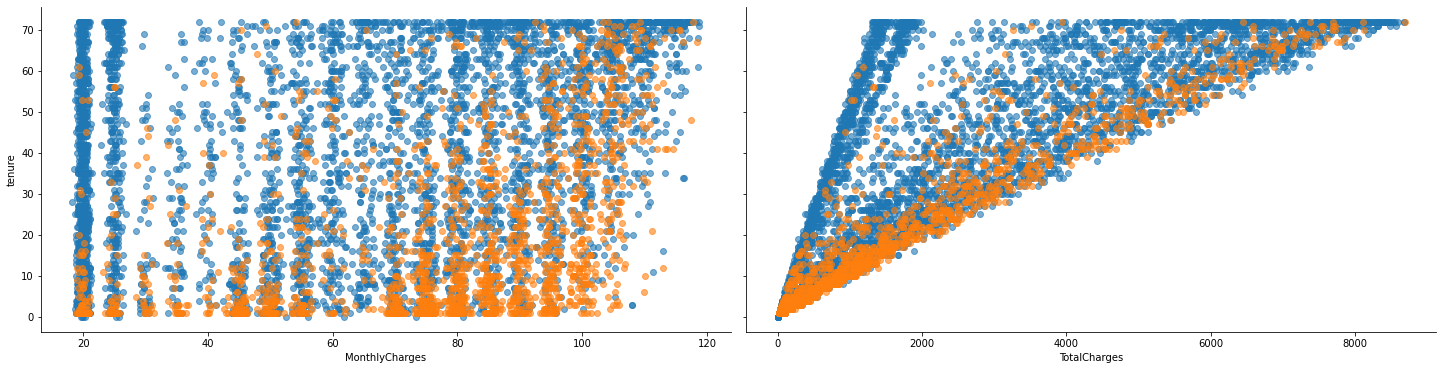

In [ ]:
g = sns.PairGrid(df, y_vars=["tenure"], x_vars=["MonthlyCharges", "TotalCharges"], height=5, hue="Churn", aspect=2)
ax = g.map(plt.scatter, alpha=0.6)

A través de los scatterplots podemos ver como a mayor sea la factura mayor es la fuga.




En el 2º vemos como a más tiempo en la compañia y por tanto más pagos realizados menor es la fuga.

Ya hemos realizado nuestras primeras conjeturas. El tiempo en la compañía y el cargo mensual serán importantes en nuestro modelo.

## Variables categóricas

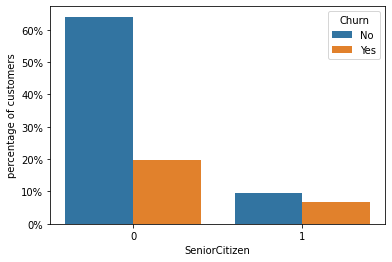

In [ ]:
def barplot_percentages(feature, orient='v', axis_name="percentage of customers"):
    ratios = pd.DataFrame()
    g = df.groupby(feature)["Churn"].value_counts().to_frame()
    g = g.rename({"Churn": axis_name}, axis=1).reset_index()
    g[axis_name] = g[axis_name]/len(df)
    if orient == 'v':
        ax = sns.barplot(x=feature, y= axis_name, hue='Churn', data=g, orient=orient)
        ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
    else:
        ax = sns.barplot(x= axis_name, y=feature, hue='Churn', data=g, orient=orient)
        ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])
    ax.plot()
barplot_percentages("SeniorCitizen")

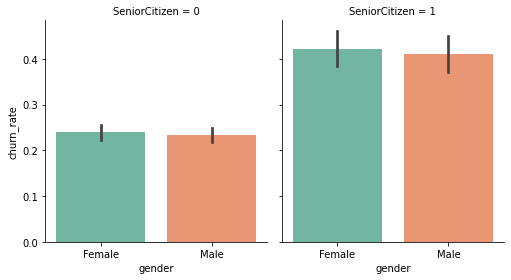

In [ ]:
df['churn_rate'] = df['Churn'].replace("No", 0).replace("Yes", 1)
g = sns.FacetGrid(df, col="SeniorCitizen", height=4, aspect=.9)
ax = g.map(sns.barplot, "gender", "churn_rate",palette='Set2',  order= ['Female', 'Male'])

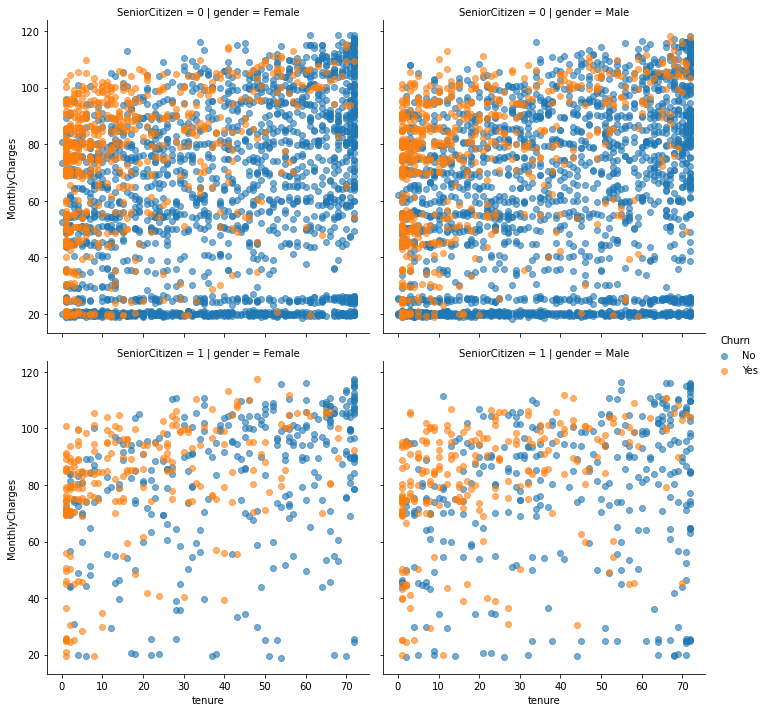

In [ ]:
g = sns.FacetGrid(df, row='SeniorCitizen', col="gender", hue="Churn", height=5)
g.map(plt.scatter, "tenure", "MonthlyCharges", alpha=0.6)
g.add_legend();



1.  El género no es motivo de abandono, como ya habiamos adelantado.
2. Los clientes Senior son solo el 16% del total, pero tienen una tasa de abandono más alta: 42% frente al 23% para clientes no senior.
3. Se ve que el tiempo en la compañía es el principal factor a diferenciar en las gáficas pero no aportan gran información.



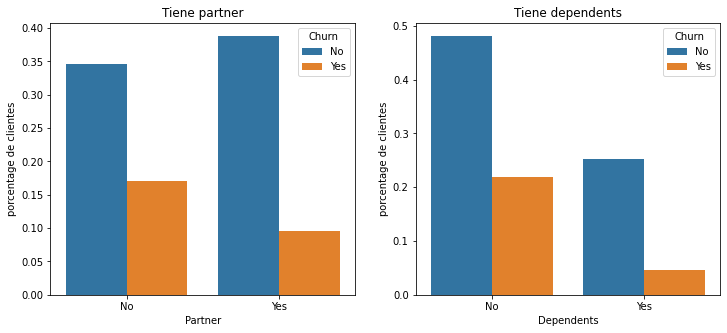

In [ ]:
fig, axis = plt.subplots(1, 2, figsize=(12,5))
axis[0].set_title("Tiene partner")
axis[1].set_title("Tiene dependents")
axis_y = "porcentage de clientes"
# Plot Partner 
gp_partner = df.groupby('Partner')["Churn"].value_counts()/len(df)
gp_partner = gp_partner.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='Partner', y= axis_y, hue='Churn', data=gp_partner, ax=axis[0])
# Plot Dependents 
gp_dep = df.groupby('Dependents')["Churn"].value_counts()/len(df)
gp_dep = gp_dep.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='Dependents', y= axis_y, hue='Churn', data=gp_dep, ax=axis[1])

Se ve claramente que los clientes que les ata un partner en la compañía o un dependiente son menos propensos a la fuga. 

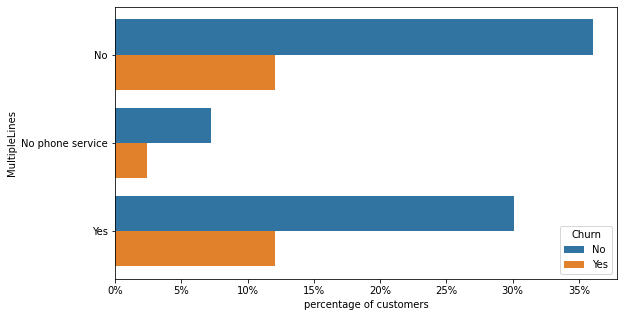

In [ ]:
plt.figure(figsize=(9, 5))
barplot_percentages("MultipleLines", orient='h')

El tener diferente número de líneas no afecta al abandono.


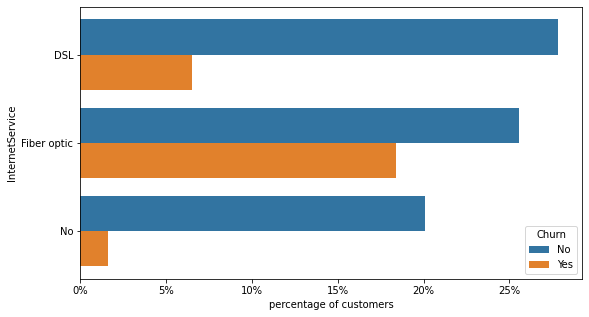

In [ ]:
plt.figure(figsize=(9, 5))
barplot_percentages("InternetService", orient="h")

Por el contrario, la diferencia en el tipo de internet contratado si afecta a la fuga, los usuarios con fibra optica abandonan más la compañia; por el contrario los que no tienen servicio de internet tienen un abandono muy bajo.

Como ya vimos anteriormente existen más servicios para aquellos que tienen contratado Internet.




Modificando el dataset puedo analizar solo aquellos clientes con internet y ver como se comportan dependiendo del servicio extra contratado.

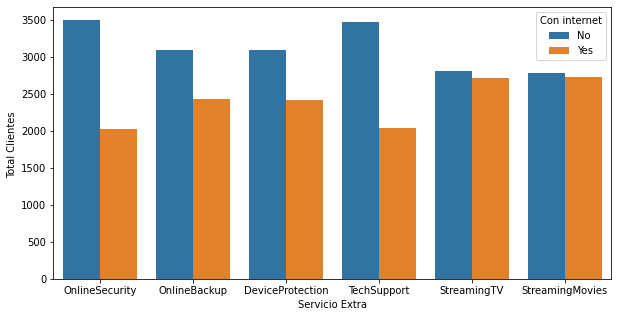

In [ ]:
cols = ["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]
df1 = pd.melt(df[df["InternetService"] != "No"][cols]).rename({'value': 'Con internet'}, axis=1)
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=df1, x='variable', hue='Con internet')
ax.set(xlabel='Servicio Extra', ylabel='Total Clientes ')
plt.show()

Los servicios que menos afectan al churn solos de Streaming, por el contrario el soporte técnico y la seguridad online afianzan el cliente a la compañía

Adicionalmente podemos ver de los que se van que servicios extra tenían

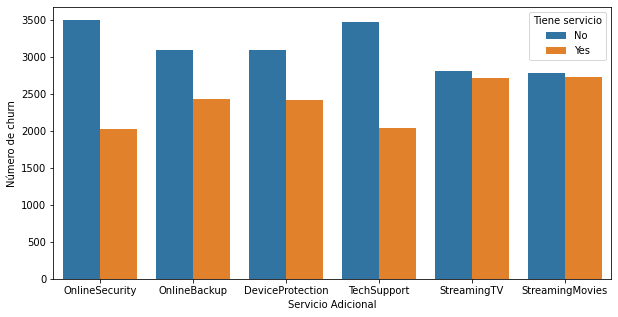

In [ ]:
cols = ["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]
plt.figure(figsize=(10, 5))
df1 = df[(df.InternetService != "No") & (df.Churn == "Yes")]
df1 = pd.melt(df[cols]).rename({'value': 'Tiene servicio'}, axis=1)
ax = sns.countplot(data=df1, x='variable', hue='Tiene servicio', hue_order=['No', 'Yes'])
ax.set(xlabel='Servicio Adicional', ylabel='Número de churn')
plt.show()

Basicamente nos confirma nuestras anteriores conjeturas

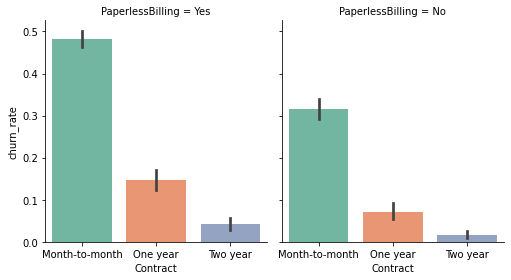

In [ ]:
g = sns.FacetGrid(df, col="PaperlessBilling", height=4, aspect=.9)
ax = g.map(sns.barplot, "Contract", "churn_rate", palette = "Set2", order= ['Month-to-month', 'One year', 'Two year'])

Los cliente con facturas en papel tienden más al abandono.

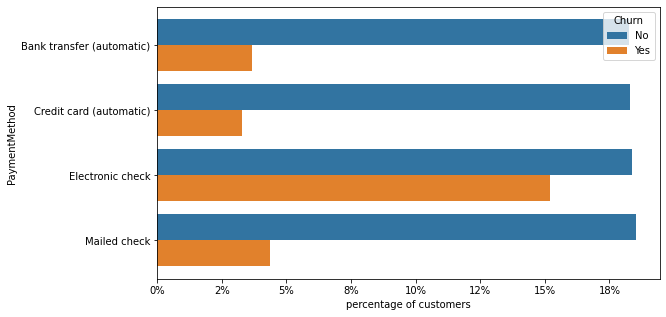

In [ ]:
plt.figure(figsize=(9, 5))
barplot_percentages("PaymentMethod", orient='h')

El método de pago más utilizado como ya vimos es el cheque electrónico teniendo la mayor tasa de abandono.

El resto de formas de pago son muy similares entre ellas.

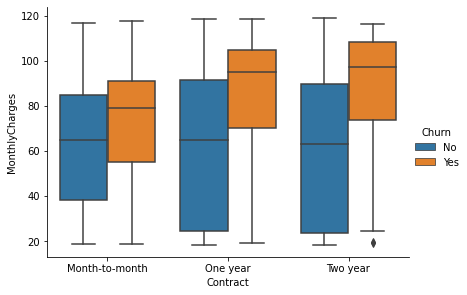

In [ ]:
ax = sns.catplot(x="Contract", y="MonthlyCharges", hue="Churn", kind="box", data=df, height=4.2, aspect=1.4)

Volvemos a ver que a mayor sea la cuota mayor es el abandono.

También los clientes que abandonan tienen facturas mayores a los que no lo hacen.

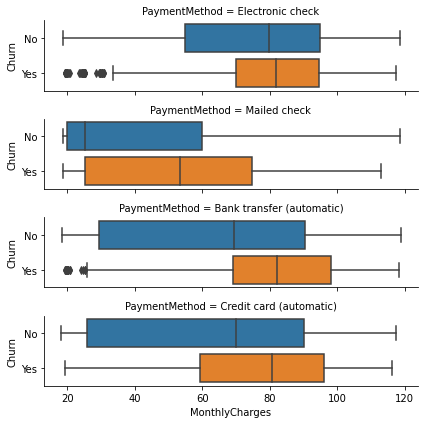

In [ ]:
ax = sns.catplot(y="Churn", x="MonthlyCharges", row="PaymentMethod", kind="box", data=df, height=1.5, aspect=4, orient='h')

No hay grandes diferencias, salvo la ya comentada que los que abandonan pagan más.

Correlación de las variables

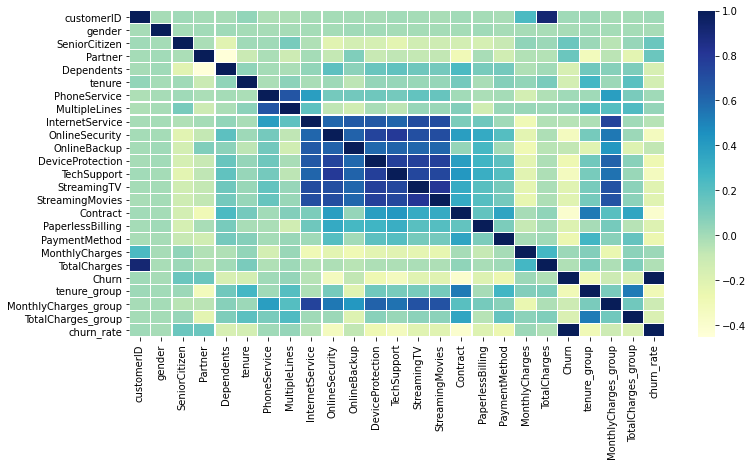

In [ ]:
plt.figure(figsize=(12, 6))

corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=.2, cmap="YlGnBu")

# Construcción del modelo predictivo.

Volvemos a cargar el dataset.

In [ ]:
df2 = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn (1).csv', sep = ',')
df2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df2.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Buscamos aquellas columnas que podemos convertir en binarias

In [ ]:
for item in df2.columns:
    print(item)
    print (df2[item].unique())

customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender
['Female' 'Male']
SeniorCitizen
[0 1]
Partner
['Yes' 'No']
Dependents
['No' 'Yes']
tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService
['No' 'Yes']
MultipleLines
['No phone service' 'No' 'Yes']
InternetService
['DSL' 'Fiber optic' 'No']
OnlineSecurity
['No' 'Yes' 'No internet service']
OnlineBackup
['Yes' 'No' 'No internet service']
DeviceProtection
['No' 'Yes' 'No internet service']
TechSupport
['No' 'Yes' 'No internet service']
StreamingTV
['No' 'Yes' 'No internet service']
StreamingMovies
['No' 'Yes' 'No internet service']
Contract
['Month-to-month' 'One year' 'Two year']
PaperlessBilling
['Yes' 'No']
PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (a

Ponemos los datos en minúscula, para despues substituirlos por 0s y 1s

In [ ]:
for item in df2.columns:
    try:
        df2[item] = df2[item].str.lower()
    except:
        print(item, "couldn't convert")
df2.head()

SeniorCitizen couldn't convert
tenure couldn't convert
MonthlyCharges couldn't convert


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-vhveg,female,0,yes,no,1,no,no phone service,dsl,no,yes,no,no,no,no,month-to-month,yes,electronic check,29.85,29.85,no
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,no,yes,no,no,no,one year,no,mailed check,56.95,1889.5,no
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,yes,no,no,no,no,month-to-month,yes,mailed check,53.85,108.15,yes
3,7795-cfocw,male,0,no,no,45,no,no phone service,dsl,yes,no,yes,yes,no,no,one year,no,bank transfer (automatic),42.30,1840.75,no
4,9237-hqitu,female,0,no,no,2,yes,no,fiber optic,no,no,no,no,no,no,month-to-month,yes,electronic check,70.70,151.65,yes


Convertimos los "Yes" y "no" en 1 y 0 

In [ ]:
columns_to_convert = ['Partner', 
                      'Dependents', 
                      'PhoneService', 
                      'PaperlessBilling', 
                      'Churn']

for item in columns_to_convert:
    df2[item].replace(to_replace='yes', value=1, inplace=True)
    df2[item].replace(to_replace='no',  value=0, inplace=True)
df2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-vhveg,female,0,1,0,1,0,no phone service,dsl,no,yes,no,no,no,no,month-to-month,1,electronic check,29.85,29.85,0
1,5575-gnvde,male,0,0,0,34,1,no,dsl,yes,no,yes,no,no,no,one year,0,mailed check,56.95,1889.5,0
2,3668-qpybk,male,0,0,0,2,1,no,dsl,yes,yes,no,no,no,no,month-to-month,1,mailed check,53.85,108.15,1
3,7795-cfocw,male,0,0,0,45,0,no phone service,dsl,yes,no,yes,yes,no,no,one year,0,bank transfer (automatic),42.30,1840.75,0
4,9237-hqitu,female,0,0,0,2,1,no,fiber optic,no,no,no,no,no,no,month-to-month,1,electronic check,70.70,151.65,1


In [ ]:
df2.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling      int64
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                 int64
dtype: object

TotalCharges tenemos que cambiarlo a tipo numérico y quitarle los nulos de nuevo.

In [ ]:
df2['TotalCharges'] = df2['TotalCharges'].replace(r'\s+', np.nan, regex=True)
df2['TotalCharges'] = pd.to_numeric(df2['TotalCharges'])

In [ ]:
df2.isnull().sum(axis = 0)

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
df2 = df2.fillna(value=0)

Igualamos el número de fugas con el que no abandona.

In [ ]:
churners_number = len(df2[df2['Churn'] == 1])
print("Number of churners", churners_number)

churners = (df2[df2['Churn'] == 1])

non_churners = df2[df2['Churn'] == 0].sample(n=churners_number)
print("Number of non-churners", len(non_churners))
df_predict = churners.append(non_churners)

Number of churners 1869
Number of non-churners 1869


Buscamos las variables con mayor correlación con la fuga.

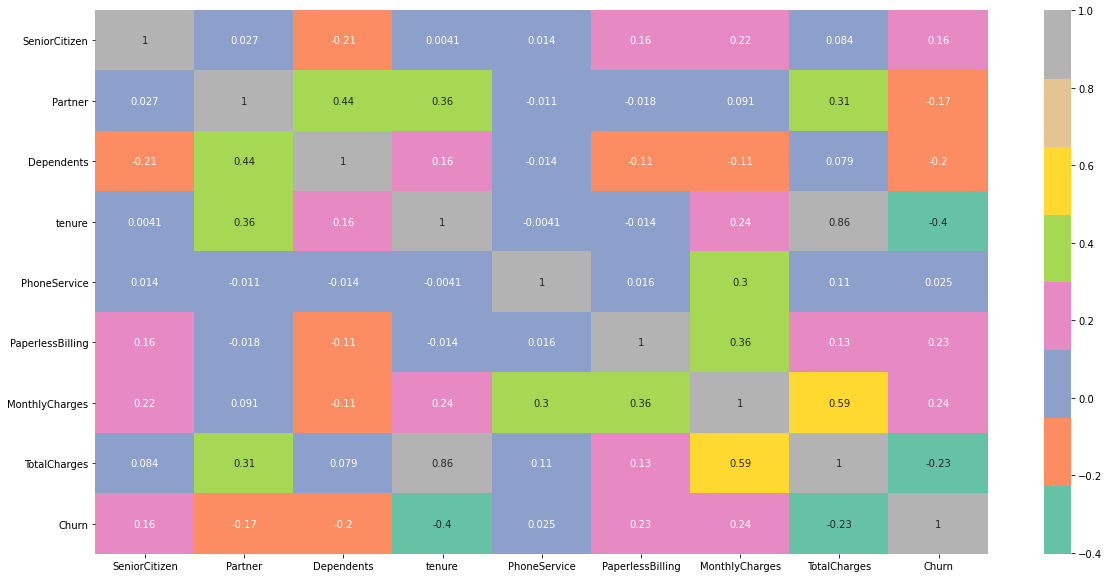

In [ ]:
def show_correlations(dataframe, show_chart = True):
    fig = plt.figure(figsize = (20,10))
    corr = dataframe.corr()
    if show_chart == True:
        sns.heatmap(corr, 
                    xticklabels=corr.columns.values,
                    yticklabels=corr.columns.values,
                    annot=True,
                    cmap = 'Set2')
    return corr

correlation_df = show_correlations(df_predict,show_chart=True)

Añadimos un identificador a nuestro dataframe del modelo.

In [ ]:
try:
    customer_id = df_predict['customerID'] 
    del df_predict['customerID']
except:
    print("already removed customerID")

In [ ]:
df_predict.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,male,0,0,0,2,1,no,dsl,yes,yes,no,no,no,no,month-to-month,1,mailed check,53.85,108.15,1
4,female,0,0,0,2,1,no,fiber optic,no,no,no,no,no,no,month-to-month,1,electronic check,70.70,151.65,1
5,female,0,0,0,8,1,yes,fiber optic,no,no,yes,no,yes,yes,month-to-month,1,electronic check,99.65,820.50,1
8,female,0,1,0,28,1,yes,fiber optic,no,no,yes,yes,yes,yes,month-to-month,1,electronic check,104.80,3046.05,1
13,male,0,0,0,49,1,yes,fiber optic,no,yes,yes,no,yes,yes,month-to-month,1,bank transfer (automatic),103.70,5036.30,1


Convertimos las variables categóricas en binarias usando el one-hot encoding

In [ ]:
model_dummy = pd.get_dummies(df_predict)
model_dummy.fillna(value=0, inplace=True)
model_dummy.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_female,gender_male,MultipleLines_no,MultipleLines_no phone service,MultipleLines_yes,InternetService_dsl,InternetService_fiber optic,InternetService_no,OnlineSecurity_no,OnlineSecurity_no internet service,OnlineSecurity_yes,OnlineBackup_no,OnlineBackup_no internet service,OnlineBackup_yes,DeviceProtection_no,DeviceProtection_no internet service,DeviceProtection_yes,TechSupport_no,TechSupport_no internet service,TechSupport_yes,StreamingTV_no,StreamingTV_no internet service,StreamingTV_yes,StreamingMovies_no,StreamingMovies_no internet service,StreamingMovies_yes,Contract_month-to-month,Contract_one year,Contract_two year,PaymentMethod_bank transfer (automatic),PaymentMethod_credit card (automatic),PaymentMethod_electronic check,PaymentMethod_mailed check
2,0,0,0,2,1,1,53.85,108.15,1,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
4,0,0,0,2,1,1,70.70,151.65,1,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
5,0,0,0,8,1,1,99.65,820.50,1,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0
8,0,1,0,28,1,1,104.80,3046.05,1,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0
13,0,0,0,49,1,1,103.70,5036.30,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0


In [ ]:
#Añadimos una columna al azar al dataframe
model_dummy['---randomColumn---'] = np.random.randint(0,1000, size=len(model_dummy))

In [ ]:
show_correlations(model_dummy, show_chart=False)["Churn"].sort_values(ascending=False)

Churn                                      1.000000
Contract_month-to-month                    0.485073
TechSupport_no                             0.398520
OnlineSecurity_no                          0.397055
InternetService_fiber optic                0.355460
PaymentMethod_electronic check             0.337598
OnlineBackup_no                            0.316214
DeviceProtection_no                        0.293741
MonthlyCharges                             0.236279
PaperlessBilling                           0.232062
SeniorCitizen                              0.163507
StreamingTV_no                             0.152446
StreamingMovies_no                         0.146466
StreamingMovies_yes                        0.075335
StreamingTV_yes                            0.069308
MultipleLines_yes                          0.056793
PhoneService                               0.025143
gender_female                              0.017658
---randomColumn---                         0.007583
gender_male 

<Figure size 1440x720 with 0 Axes>

In [ ]:
try:
    label = model_dummy['Churn'] # Eliminamos el identificador previo, antes del testeo
    del model_dummy['Churn']
except:
    print("label already removed.")

KNeighborsClassifier
0.661 
 - - - - -  

DecisionTreeClassifier
0.755 
 - - - - -  



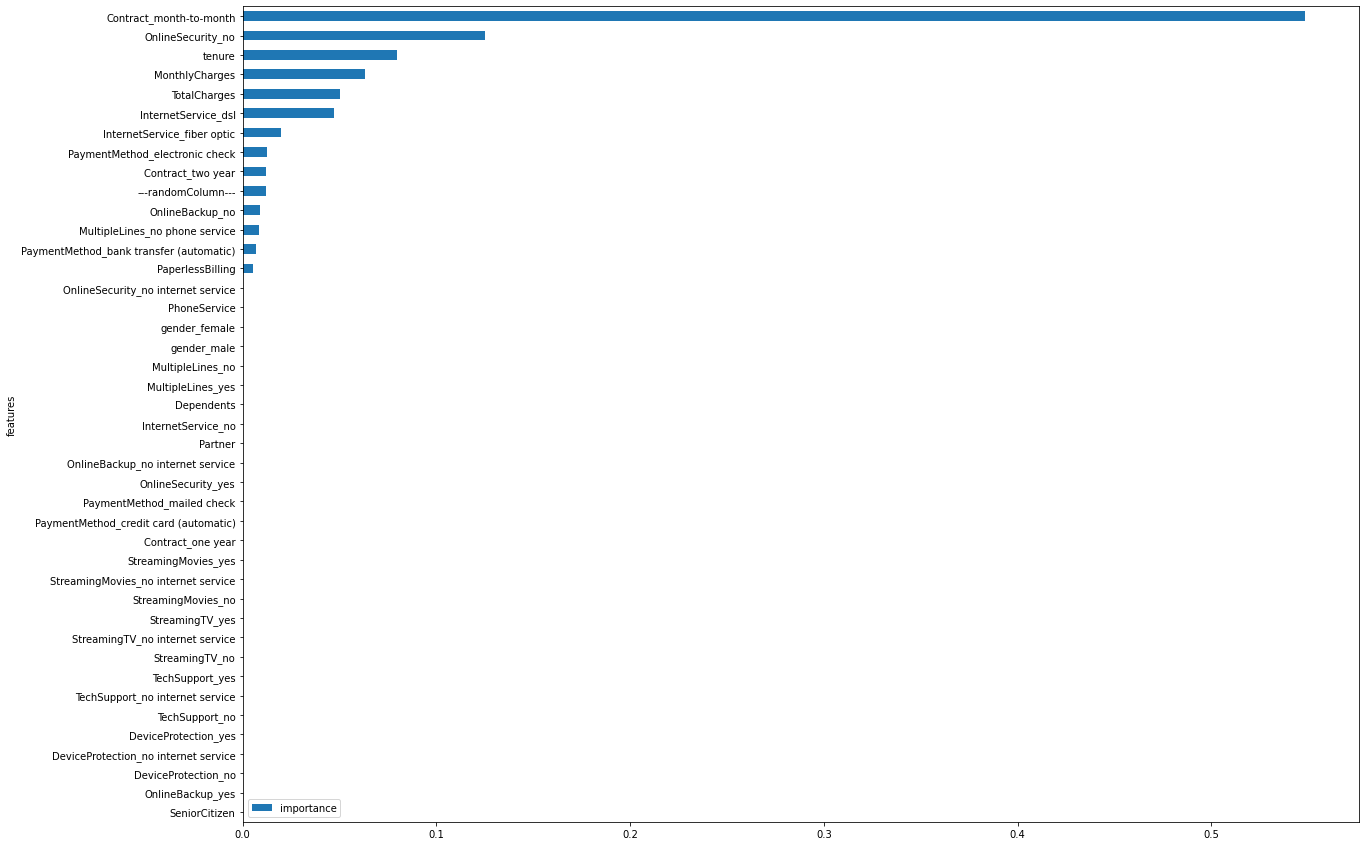

In [ ]:
from sklearn.model_selection import train_test_split
feature_train, feature_test, label_train, label_test = train_test_split(model_dummy, label, test_size=0.3)

# Usamos kneighboors como clasificador
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

classifiers = [
    KNeighborsClassifier(5),    
    DecisionTreeClassifier(max_depth=5)
]
    

# Interamos sobre los clasificadores
for item in classifiers:
    classifier_name = ((str(item)[:(str(item).find("("))]))
    print (classifier_name)
    
    #creamos el clasificador y lo probamos
    clf = item
    clf.fit(feature_train, label_train)
    pred = clf.predict(feature_test)
    score = clf.score(feature_test, label_test)
    print (round(score,3),"\n", "- - - - - ", "\n")
    
feature_df2 = pd.DataFrame()
feature_df2['features'] = model_dummy.columns
feature_df2['importance'] = clf.feature_importances_
feature_df2.sort_values(by='importance', ascending=False)    
feature_df2.set_index(keys='features').sort_values(by='importance', ascending=True).plot(kind='barh', figsize=(20, 15))    

Confusion matrix, without normalization
[[380 162]
 [113 467]]
Normalized confusion matrix
[[0.7  0.3 ]
 [0.19 0.81]]


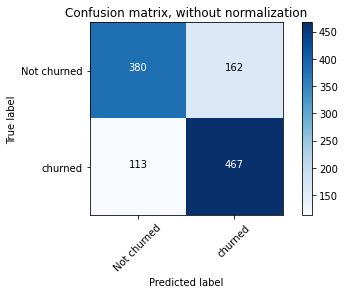

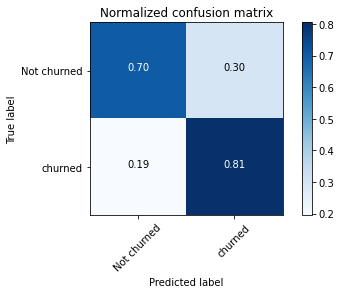

              precision    recall  f1-score   support

 Not churned       0.77      0.70      0.73       542
     churned       0.74      0.81      0.77       580

    accuracy                           0.75      1122
   macro avg       0.76      0.75      0.75      1122
weighted avg       0.76      0.75      0.75      1122



In [ ]:
#Usamos la confusion_matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """Esto nos permite imprimir y trazar la confusion_matrix.
    Para normalizarla a través de `normalize=True`."""
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Calculamos la confusion matrix
cnf_matrix = confusion_matrix(label_test, pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
class_names = ['Not churned','churned']

plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()


from sklearn.metrics import classification_report
eval_metrics = classification_report(label_test, pred, target_names=class_names)
print(eval_metrics)

Obteniendo unos resultados correctos, indicando que nuestro modelo tiene sentido.

Ajustamos los parametros

In [ ]:
from sklearn.model_selection import GridSearchCV

max_depth_range = range(2,20,2)
leaf_range = range(1,10,2)
n_estimators_range = range(10,200,10)
max_features_range = range(1,len(model_dummy.columns),5)


param_grid = dict(max_depth = max_depth_range,
                 min_samples_leaf = leaf_range,
                 n_estimators = n_estimators_range,
                 max_features = max_features_range
                )

Corremos el modelo predictivo

In [ ]:
# Preprocessing original dataframe
def preprocess_df2(dataframe):
    x = dataframe.copy()
    try:
        customer_id = x['customerID']
        del x['customerID'] # Don't need in ML DF
    except:
        print("already removed customerID")
    model_dummy = pd.get_dummies(x)
    model_dummy.fillna(value=0, inplace=True)

    # import random done above
    model_dummy['---randomColumn---'] = np.random.randint(0,1000, size=len(model_dummy))

    try:
        label = model_dummy['Churn']
        del model_dummy['Churn']
    except:
        print("label already removed.")
    return model_dummy, customer_id, label

original_df2 = preprocess_df2(df2)

In [ ]:
output_df2 = original_df2[0].copy()
output_df2['---randomColumn---']
output_df2['prediction'] = clf.predict_proba(output_df2)[:,1]
output_df2['churn'] = original_df2[2]
output_df2['customerID'] = original_df2[1]

In [ ]:
print('Mean predict proba of churn:',round(output_df2[output_df2['churn'] == 1]['prediction'].mean(),2))
print('Mean predict proba of NON-churn:',round(output_df2[output_df2['churn'] == 0]['prediction'].mean(),2))

Mean predict proba of churn: 0.7
Mean predict proba of NON-churn: 0.32


In [ ]:
activate = output_df2[output_df2['churn'] == 0]
activate[['customerID','churn','prediction']]

,customerID,churn,prediction
0,7590-vhveg,0,0.899471
1,5575-gnvde,0,0.035256
3,7795-cfocw,0,0.035256
6,1452-kiovk,0,0.676056
7,6713-okomc,0,0.253731
...,...,...,...
7037,2569-wgero,0,0.035256
7038,6840-resvb,0,0.093960
7039,2234-xaduh,0,0.057692
7040,4801-jzazl,0,0.490909


Ya somos capaces de predecir el churn mediante un modelo.

# Bibliografia




1.   https://stackoverflow.com/questions/40659212/futurewarning-elementwise-comparison-failed-returning-scalar-but-in-the-futur
2.   https://stackoverflow.com/questions/22635110/sorting-the-order-of-bars-in-pandas-matplotlib-bar-plots/22636132
3. https://pandas.pydata.org/docs/user_guide/visualization.html#plotting-directly-with-matplotlib
4. https://python-graph-gallery.com/3-control-color-of-barplots/
5. https://seaborn.pydata.org/tutorial/categorical.html
6. https://towardsdatascience.com/formatting-tips-for-correlation-heatmaps-in-seaborn-4478ef15d87f
7. https://seaborn.pydata.org/tutorial/color_palettes.html

